In [1]:
import nltk
nltk.download() # 최초 한번은 nltk의 리소스를 다운로드 받아야함.

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
import pandas as pd
import glob # 경로와 이름을 지정해 파일 처리 작업
import re
from functools import reduce # 2차원 리스트 -> 1차원 리스트

# nltk : 자연어 처리 패키지
from nltk.tokenize import word_tokenize # 단어 토큰화
from nltk.corpus import stopwords # 불용어 정보 제공
from nltk.stem import WordNetLemmatizer # 표제어 추출 

from collections import Counter # 갯수 자동 계산

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS # wordcloud용 불용어

In [3]:
all_files = glob.glob('data/myCabinetExcelData*.xls')
print(all_files)

['data\\myCabinetExcelData (1).xls', 'data\\myCabinetExcelData (2).xls', 'data\\myCabinetExcelData (3).xls', 'data\\myCabinetExcelData (4).xls', 'data\\myCabinetExcelData (5).xls', 'data\\myCabinetExcelData (6).xls', 'data\\myCabinetExcelData (7).xls', 'data\\myCabinetExcelData (8).xls', 'data\\myCabinetExcelData (9).xls', 'data\\myCabinetExcelData.xls']


In [4]:
all_file_data = []

for file in all_files:
    data_frame = pd.read_excel(file)
    all_file_data.append(data_frame)
    
all_file_data[0].head()

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Speak Up for Museums: The AAM Guide to Advocac...,"Jones, J.",MUSEUM EDUCATION ROUNDTABLE,2012
1,NaN,2,"Riches, Rivals and Radicals: The collectors wh...","Schwarzer, M.",AMERICAN ASSOCIATION OF MUSEUMS,2006
2,NaN,3,Reviews Hitlers Museum: Die Fotoalben Gemaldeg...,"Yeide, N. H.",AMERICAN ASSOCIATION OF MUSEUMS,2004
3,NaN,4,Diverse challenges : How do changing views of ...,"Nightingale, Julie",MUSEUMS ASSOC,2015
4,NaN,5,From Museum to Museums: The Evolution of the G...,"Dennison, L.",BLACKWELL PUBLISHERS,2003


In [5]:
all_file_data_concat = pd.concat(all_file_data, axis=0, ignore_index=True)

all_file_data_concat.tail()

,Unnamed: 0,번호,제목,저자,출판사,출판일
995,NaN,96,"Seven Stories, the National Centre for Childre...",unknown,MUSEUMS ASSOC,2015
996,NaN,97,Museum/University Ecology: An Earth Day Exampl...,"Clarke-Vivier, Sara; Bard, Jane",MANEY PUBLISHING,2016
997,NaN,98,British Museum's Nazi loot dilemma could promp...,unknown,MUSEUMS ASSOC,2005
998,NaN,99,FAITH AND COMMUNITY: INTERPRETING BELIEFS IN T...,STEPHEN TERENCE WELSH,"Museum Ethnographers Group,",2017
999,NaN,100,Visitor engagement at museums: Generation Y an...,"Barron, Paul; Leask, Anna",Taylor & Francis,2017


In [6]:
all_file_data_concat.to_csv('data/riss_Museum.csv', encoding='utf-8', index=False)

In [7]:
all_title = all_file_data_concat['제목']
all_title

0      Speak Up for Museums: The AAM Guide to Advocac...
1      Riches, Rivals and Radicals: The collectors wh...
2      Reviews Hitlers Museum: Die Fotoalben Gemaldeg...
3      Diverse challenges : How do changing views of ...
4      From Museum to Museums: The Evolution of the G...
                             ...                        
995    Seven Stories, the National Centre for Childre...
996    Museum/University Ecology: An Earth Day Exampl...
997    British Museum's Nazi loot dilemma could promp...
998    FAITH AND COMMUNITY: INTERPRETING BELIEFS IN T...
999    Visitor engagement at museums: Generation Y an...
Name: 제목, Length: 1000, dtype: object

In [11]:
stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer() # 표제어 추출 작업 객체

In [12]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower()) # 단어 단위로 제목 나누기 / 소문자 처리
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # 불용어 제거
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # 표제어 처리
    words.append(EnWordsTokenStopLemma)

In [14]:
print(words[:5])

[['speak', 'museum', 'aam', 'guide', 'advocacy', 'gail', 'ravintzky', 'silberglied', 'published', 'aam', 'press'], ['rich', 'rival', 'radical', 'collector', 'shaped', 'american', 'museum', 'excerpt', 'aam', 'centennial', 'publication'], ['review', 'hitler', 'museum', 'die', 'fotoalben', 'gemaldegalerie', 'linz', 'book', 'received'], ['diverse', 'challenge', 'changing', 'view', 'multiculturalism', 'affect', 'museum'], ['museum', 'museum', 'evolution', 'guggenheim']]


In [16]:
# 2차원 리스트를 1차원 리스트로 변경
words2 = list(reduce(lambda x, y: x+y, words))
print(words2[:10])

['speak', 'museum', 'aam', 'guide', 'advocacy', 'gail', 'ravintzky', 'silberglied', 'published', 'aam']


In [17]:
count = Counter(words2) # 단어의 빈도 세기
count

Counter({'speak': 2,
         'museum': 1215,
         'aam': 3,
         'guide': 5,
         'advocacy': 1,
         'gail': 1,
         'ravintzky': 1,
         'silberglied': 1,
         'published': 1,
         'press': 11,
         'rich': 4,
         'rival': 1,
         'radical': 2,
         'collector': 2,
         'shaped': 1,
         'american': 15,
         'excerpt': 1,
         'centennial': 1,
         'publication': 2,
         'review': 8,
         'hitler': 1,
         'die': 2,
         'fotoalben': 1,
         'gemaldegalerie': 1,
         'linz': 1,
         'book': 5,
         'received': 1,
         'diverse': 1,
         'challenge': 13,
         'changing': 7,
         'view': 9,
         'multiculturalism': 1,
         'affect': 4,
         'evolution': 3,
         'guggenheim': 1,
         'philosophy': 2,
         'introduction': 7,
         'special': 5,
         'issue': 11,
         'leach': 1,
         'pottery': 2,
         'studio': 1,
         'pott

In [19]:
# 상위 50개를 추출하여 dictionary 데이터 생성
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d"%(tag,counts))

museum : 1215
art : 185
fogg : 89
report : 82
new : 78
gallery : 59
national : 58
collection : 57
university : 51
london : 45
history : 42
study : 42
british : 38
web : 37
william : 34
visitor : 33
case : 31
hayes : 31
science : 27
world : 27
life : 25
experience : 25
multimedia : 24
learning : 23
child : 23
people : 22
harvard : 22
community : 21
site : 21
staff : 21
object : 20
social : 20
cultural : 19
local : 18
future : 18
two : 18
pp : 17
digital : 17
interactive : 17
impact : 17
century : 17
exhibition : 17
change : 17
perspective : 17
virtual : 17
year : 16
research : 16
school : 16
building : 16
story : 16


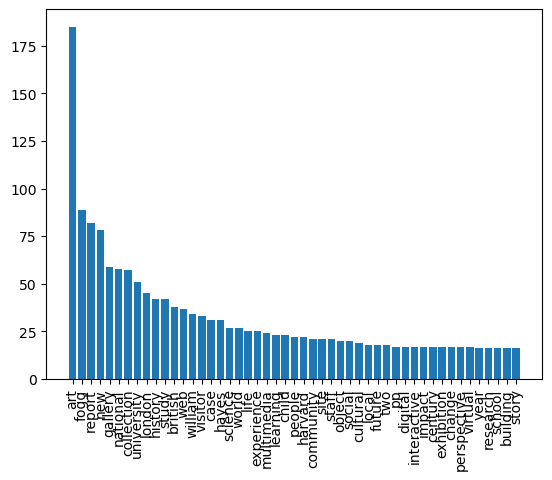

In [23]:
del word_count['museum']

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=90)# x축 눈금
plt.show()

In [27]:
all_file_data_concat['doc_count']=0
summary_year = all_file_data_concat.groupby('출판일', as_index=False)['doc_count'].count()

summary_year

,출판일,doc_count
0,1896,1
1,1897,1
2,1898,1
3,1899,1
4,1900,1
...,...,...
108,2018,15
109,2019,25
110,2020,14
111,2021,34


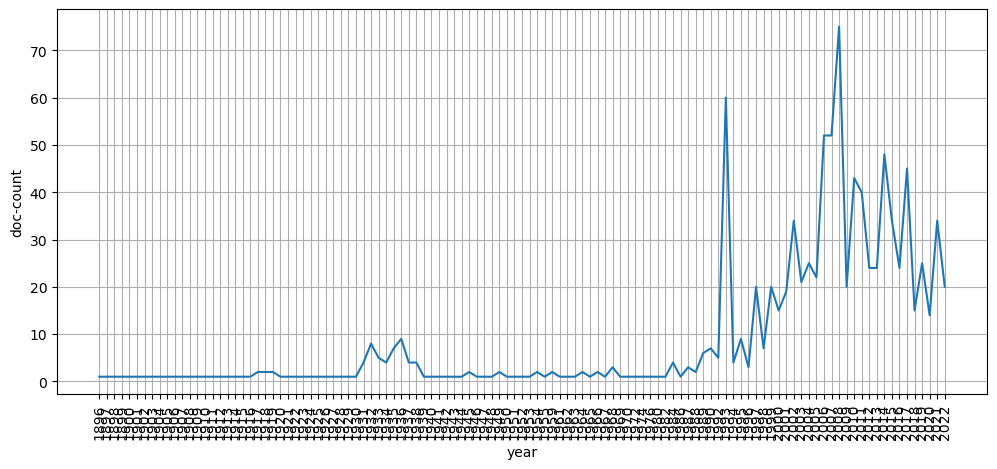

In [31]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [y for y in summary_year['출판일']], rotation=90)

plt.show()

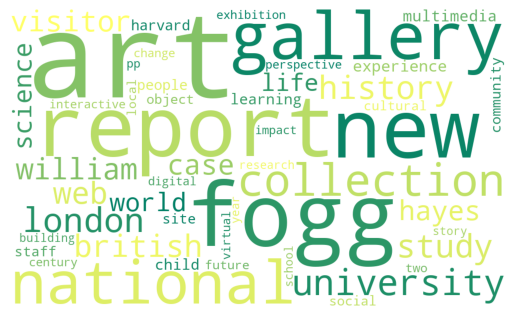

In [32]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='white', colormap='summer', stopwords=stopwords
              , width=1000, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.imshow(cloud)
plt.axis('off')
plt.show()

In [33]:
cloud.to_file('data/riss_museum_WordCloud.jpg')